In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn

import edhec_risk_kit as erk

%matplotlib inline

%load_ext autoreload
%autoreload 2

- The normal distribution underestimates the risk for extreme returns.
- Look at higher-order moments: skewness and kurtosis
- Some hedge fund strategies (e.g. Convertible Arb) have strong negative skewness (think -2.7) and strong positive kurtosis (think 23.3).
  - This is what "Picking up pennies in front of a steamroller" means, I think
  - Most days your return is slightly above average, but there are heavy negative outlier days too
  - Negative skewness means the negative outliers are more severe than the positive ones
- **High negative skewness implies that the symmetric std does not capture downside risk completely!**

### Histogram of negatively skewed (theta = -2.5) random variable

[Method](https://pdfs.semanticscholar.org/5198/32c082b6265827205c97764cf77f705a979c.pdf)

I didn't manage to simulate a high-kurtosis RV (as described [here](https://stats.stackexchange.com/a/43487/2091))

In [2]:
n = 1000
theta = -2.5  # negative skewness
U = randn(n)
V = randn(n)
X = (theta * np.abs(U) + V) / np.sqrt(1 + theta**2)

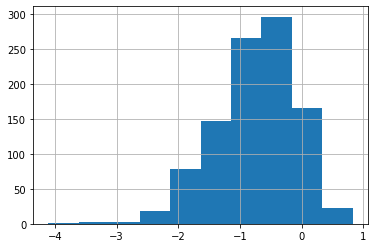

In [3]:
pd.Series(X).hist()

### Semi-volatility / semi-deviation

- The volatility of the subsample of below-average (or below-zero) returns
- Important for asymmetric distributions
- Because we don't care about upside volatility, in fact we welcome it

### Value at Risk (VaR)

- Maximum "expected" loss over a given time period
- You must define a confidence level, e.g. 99%
- Exclude 1% worst losses, then compute the worst-case
- errrm, it's just the (absolute value of the) 1% quantile of the return distribution for a specified time period (e.g. weekly)

### Distribution beyond VaR / CVaR

- Expected shortfall (loss) if you fall below the VaR
- $CVaR = -E(R|R \leq -VaR)$

----

### Using the ERK module

In [4]:
returns = erk.get_ffme_returns()

In [5]:
erk.drawdown(returns['SmallCap'])

,Wealth,Previous Peak,Drawdown
date,,,
1926-07,9.855000e+02,9.855000e+02,0.000000
1926-08,1.035958e+03,1.035958e+03,0.000000
1926-09,1.045592e+03,1.045592e+03,0.000000
1926-10,9.949854e+02,1.045592e+03,-0.048400
1926-11,9.872245e+02,1.045592e+03,-0.055822
...,...,...,...
2019-10,1.711126e+09,2.218118e+09,-0.228569
2019-11,1.733370e+09,2.218118e+09,-0.218540
2019-12,1.844306e+09,2.218118e+09,-0.168527


----

### The EDHEC hedge fund indices

In [9]:
hfi = erk.get_hfi_returns()

Check it out, negative skewness and heavy kurtosis!

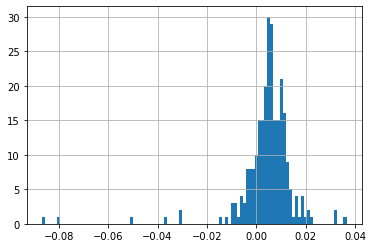

In [11]:
hfi['Fixed Income Arbitrage'].hist(bins=100)